Index(['Unnamed: 0', ' symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
0      High
1      High
2       Low
3      High
4    Medium
Name: price-binned, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


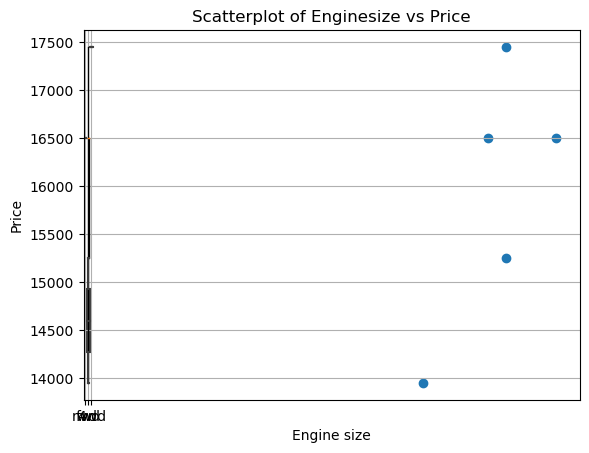

F_onewayResult(statistic=0.34600638977635784, pvalue=0.7937423904841613)


(0.0, 19744.06983808197)

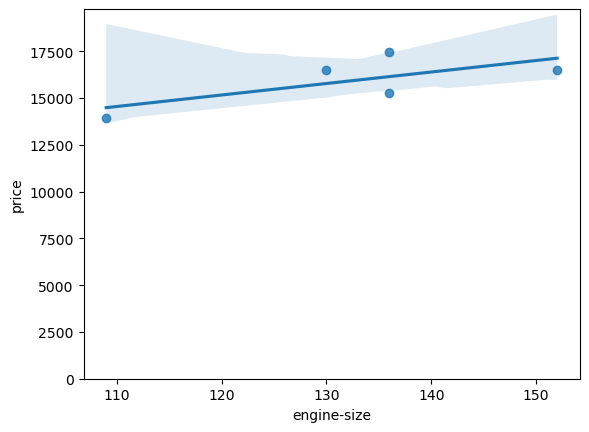

In [1]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
df = pd.read_excel('carss.csv.xlsx')
df.head()



data = df
# Finding the missing values
data.isna().any()
# Finding if missing values
data.isnull().any()




# converting mpg to L / 100km
data['city-mpg'] = 235 / df['city-mpg']
data.rename(columns = {'city_mpg': "city-L / 100km"}, inplace = True)

print(data.columns)

# checking the data type of each column
data.dtypes




data.price.unique()

# Here it contains '?', so we Drop it
data = data[data.price != '?']

# checking it again
data.dtypes





data.price.unique()

# Here it contains '?', so we Drop it
data = data[data.price != '?']

# checking it again
data.dtypes







data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins,
							labels = group_names,
							include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()









# categorical to numerical variables
pd.get_dummies(data['fuel-type']).head()

# descriptive analysis
# NaN are skipped
data.describe()









# examples of box plot
plt.boxplot(data['price'])

# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = data)

# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()








# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
						as_index = False).mean()

data_grp









# pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
							columns = 'body-style')
data_pivot

# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()













# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by
# variation within sample group
# p-value = confidence degree
data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
							grouped_annova.get_group('audi')['price'],
							grouped_annova.get_group('alfa-romero')['price'],
              grouped_annova.get_group('audi')['price'],
							grouped_annova.get_group('alfa-romero')['price']

									)
print(annova_results_l)

# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )

